# 微分処理のテスト2 - ２次元でテスト

## sift.pyをインポート

In [122]:
%cd ~/PycharmProjects/mps_20160220/noguchi

/Users/noguchi_osamu/PycharmProjects/mps_20160220/noguchi


In [123]:
%ls

SHIFT.ipynb
__pycache__/
img/
sift.py
【sift.pyのテスト1】微分処理のテスト.ipynb
【sift.pyのテスト2】微分処理のテスト(2次元でテスト）.ipynb


In [124]:
from PIL import Image
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

In [125]:
import sys
#del sys.modules['sift']
import sift
sys.modules['sift']

<module 'sift' from '/Users/noguchi_osamu/PycharmProjects/mps_20160220/noguchi/sift.py'>

## パラメータを設定

In [126]:
sigma=0.32
#sigma = 1.6
s= 3
xmax = 100
ymax = 100
k = np.power(2.0, 1.0/s)

## テスト用の条件を設定
### テスト用の関数を設定

In [127]:
def test(x, y, sigma):
    # 2次関数
    #return (0.1 * (x - xmax/2)) ** 2 # １変数の2次関数
    #return (0.1 * (x - xmax/2)) ** 2 + (0.1 * (y - ymax/2))**2 # 2変数の2次関数
    # 3次関数
    #return (0.1 * (x- xmax/2) **3) * sigma # 1変数の3次関数
    return (((0.1 * (x- xmax/2)) **3 + (0.1 * (y-ymax/2)) ** 3)) * sigma  # 3次関数（クロス項なし）
    #return (((0.1 * (x- xmax/2)) **3 + (0.1 * (y-ymax/2)) **3) * 0.1 * (x-xmax/2) * (y-ymax/2)) * sigma  # 3次関数（クロス項あり）
    #return np.sin(x / 25) + np.cos(y / 25) # sin, cos (クロス項なし)
    #sin/cos
    #return np.sin(x / 25) + np.cos(y / 25) + np.sin(x/25 * y/25) # sin, cos (クロス項あり)


### テスト用の刻み幅を設定

In [128]:
def delta(i):
    #return sigma * np.power(k,i)
    return i * sigma

## テスト用のoctaveを作成 

In [129]:
x = np.arange(0, xmax)
y = np.arange(0, ymax)

octave = OrderedDict()
for i in range(1, s + 3):
        scale = delta(i)
        #v = [[[_y, _x] for _x in np.arange(0, xmax)] for _y in np.arange(0, ymax)]     # -- debug
        octave[scale] = np.array([[test(_x, _y, scale) for _x in x] for _y in y])

#--- debug
print(octave[0.32][10,11])
print(test(11,10, 0.32))

-39.46208
-39.46208000000001


## プロットしてみる

In [130]:
%matplotlib inline

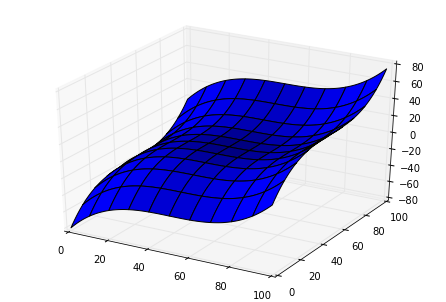

In [131]:
si = 0.32

x = np.arange(0, xmax)
y = np.arange(0, ymax)
X, Y = np.meshgrid(x,y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,octave[si][Y,X]) # Y,Xとなっているところに注意!


## ダミーの変数を用いてExtremaSpaceを作成

In [132]:
dog_space = list(octave)

In [133]:
ex = sift.ExtremaSpace(dog_space)

## 微分(１階・２階)を実行

### 1. 試しに２階微分を計算してみる

In [134]:
sis = list(octave.keys())

d2x = ex.d2fdx2(1, 1, sis[1], sis[1]-sis[0], sis[2]-sis[1], octave)
d2x

array([[ -1.88160000e-01,   0.00000000e+00,  -7.33928000e+00],
       [  0.00000000e+00,  -1.88160000e-01,  -7.33928000e+00],
       [ -7.33928000e+00,  -7.33928000e+00,  -8.88178420e-14]])

### 2. 1階微分をプロットしてみる

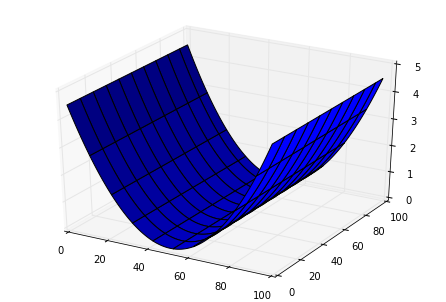

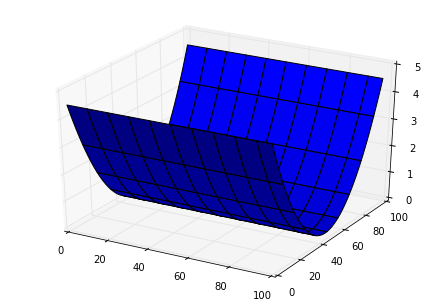

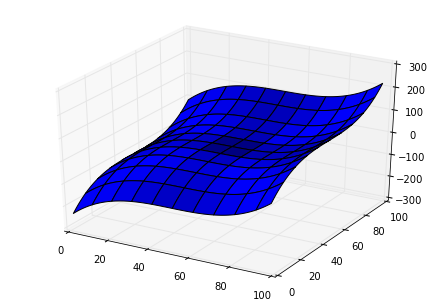

In [135]:
sis = list(octave.keys())

x = np.arange(1, xmax-1)
y = np.arange(1, ymax-1)
X, Y = np.meshgrid(x,y)

# x方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.dx(Y, X, sis[1], sis[2]-sis[1], octave)[0,0]) # Y,Xとなっているところに注意！

# y方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.dx(Y, X, sis[1], sis[2]-sis[1], octave)[1,0]) # 同上

# z方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.dx(Y, X, sis[1], sis[2]-sis[1], octave)[2,0]) # 同上

### 3. 2階微分をプロットしてみる

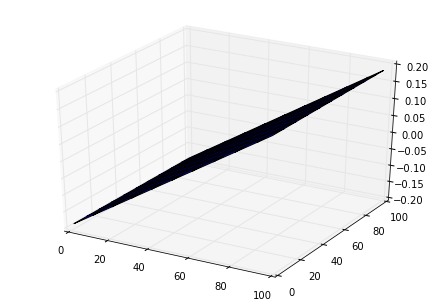

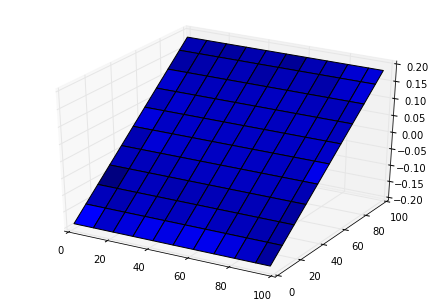

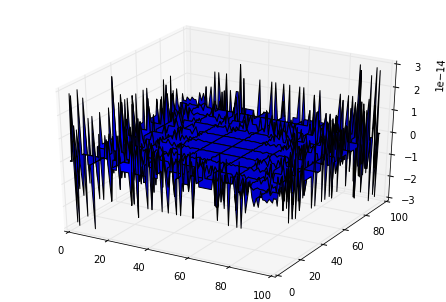

In [136]:
sis = list(octave.keys())

x = np.arange(1, xmax-1)
y = np.arange(1, ymax-1)
X, Y = np.meshgrid(x,y)

# x方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.d2fdx2(Y, X, sis[1], sis[1]-sis[0], sis[2]-sis[1], octave)[0,0])

# y方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.d2fdx2(Y, X, sis[1], sis[1]-sis[0], sis[2]-sis[1], octave)[1,1])

# x-y方向の微分をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,ex.d2fdx2(Y, X, sis[1], sis[1]-sis[0], sis[2]-sis[1], octave)[0,1])


## テイラー展開をしてみる
- テーラー展開式：
$$ f(x) = f(c) + \frac{df}{dx}\big|_c \cdot (x - c) + \frac{\partial^2 f}{\partial x^2}\big|_c \cdot (x-c)^2$$
- 極値の近似点（テーラー展開式上の極値）：
$$ \hat{x} = - \frac{\partial^2 f}{\partial x^2}^{-1} \cdot \frac{\partial f}{\partial x} \big|_c+ c$$
$$ f(\hat{x}) = f(c) - \frac{1}{2} \frac{\partial f}{\partial x}^T \frac{\partial^2 f}{\partial x^2}^{-1}\frac{\partial f}{\partial x}\big|_c $$ 

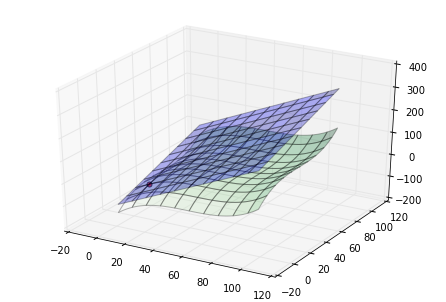

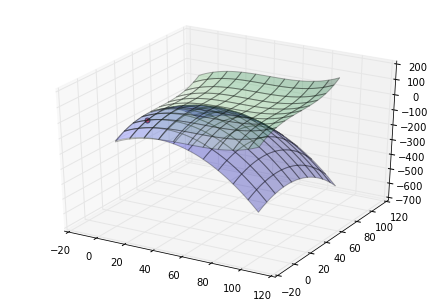

In [137]:
sis = list(octave.keys())

#x,yのgridを生成
x = np.arange(1, xmax-1)
y = np.arange(1, ymax-1)
X, Y = np.meshgrid(x,y)

# c=(c1, c2, c3)^Tでテーラー展開をする。 
c1 = x[10]
c2 = y[20]
c3 = sis[1]

dsigma1 = sis[1] - sis[0]
dsigma2 = sis[2] - sis[1]

c = np.array([c1, c2, c3])[:,np.newaxis]
fc = octave[sis[1]][c2, c1] # c2, c1となっているところに注意！
dc = ex.dx(c2, c1, c3, dsigma1, octave) # c2, c1となっているところに注意！
dcc = ex.d2fdx2(c2, c1, sis[1], dsigma1, dsigma2, octave) # c2, c1となっているところに注意！

# テーラー展開をする関数を用意
def talor1(x, y): # 1階のみの場合
    _x = np.array([x, y, c3])[:, np.newaxis]
    z = fc + dc.T.dot(_x-c)[0,0]
    return z

def talor2(x, y): # 2階までで近似
    _x = np.array([x, y, c3])[:, np.newaxis]
    z = fc + dc.T.dot(_x-c)[0,0]
    z = fc + dc.T.dot(_x-c)[0,0] + 0.5 * ((_x-c).T.dot(dcc.dot(_x-c)))[0,0] 
    return z

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,octave[c3][Y,X], alpha = 0.3, cmap = 'Greens')
ax.plot_surface(X,Y,talor1(X, Y) , alpha = 0.3)
ax.scatter3D(c1, c2, fc, c='r', marker = '.', s=100)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,octave[c3][Y,X], alpha = 0.3, cmap = 'Greens')
ax.plot_surface(X,Y,talor2(X, Y) , alpha = 0.3)
ax.scatter3D(c1, c2, fc, c='r', marker = '.', s=100)
